In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the data set
books=pd.read_csv(r'C:\Users\Rahul\Desktop\Github Files\Book Reccomendation System\data sets\Books.csv', encoding='Latin1')
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# EDA

In [3]:
#Dropping  all three Image URL features.
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication',
       'Publisher'],
      dtype='object')

In [5]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [6]:
#Check for the number of null values in each column.
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [10]:
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [11]:
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [12]:
#Replacing these three empty cells with ‘Other’.
books.at[187689 ,'Book-Author'] = 'Other'

books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'

In [13]:
#Again check for null values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [14]:
#Unique years of publications
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [15]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [16]:
books.loc[books['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [17]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = '2003'
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [18]:
#Converting year of Publication from object to numbers
books['Year-Of-Publication']=books['Year-Of-Publication'].astype(int)
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [21]:
#Replacing Invalid years with max year
from collections import Counter
cnt = Counter(books['Year-Of-Publication'])
[k for k, v in cnt.items() if v == max(cnt.values())]

books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [22]:
# Uppercasing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()
books.sample(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
4878,0451522303,Animal Farm,George Orwell,1956,Signet Book
111584,0843931612,Prairie Heat,Madeline Baker,1991,Leisure Books


In [25]:
# Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True)
books.reset_index(drop = True, inplace = True)

In [26]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271047 non-null  object
 1   Book-Title           271047 non-null  object
 2   Book-Author          271047 non-null  object
 3   Year-Of-Publication  271047 non-null  int32 
 4   Publisher            271047 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [27]:
#Read user data set
user=pd.read_csv(r'C:\Users\Rahul\Desktop\Github Files\Book Reccomendation System\data sets\Users.csv', encoding='Latin1')
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [28]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [30]:
user.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [31]:
print(sorted(list(user["Age"].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

<AxesSubplot:>

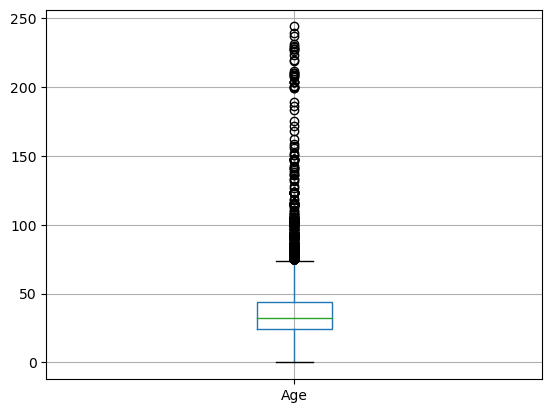

In [32]:
user.boxplot(column='Age')

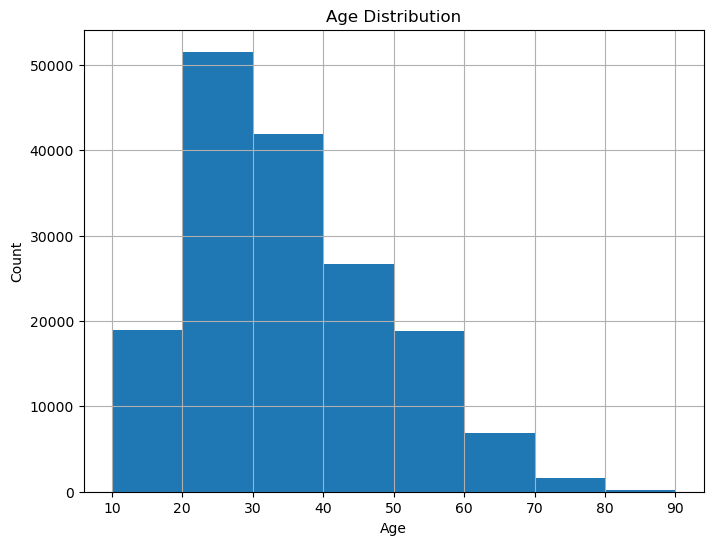

In [33]:
plt.figure(figsize=(8,6))
user.Age.hist(bins=[10*i for i in range(1, 10)])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [37]:
percent_missing = user['Age'].isnull().sum() * 100 / len(user['Age'])
missing_value_df = pd.DataFrame({'column_name': user['Age'],
                                 'percent_missing': percent_missing})
percent_missing

39.71985741847105

In [41]:
required = user[user['Age'] <= 70]
required = required[required['Age'] >= 15]

In [42]:
median = round(required['Age'].median())
median

32

In [43]:
#Outliers with age grater than 70 are substituted with median
user.loc[user['Age'] > 70, 'Age'] = median
#Outliers with age less than 15 years are substitued with median
user.loc[user['Age'] < 15, 'Age'] = median

#Filling null values with median
user['Age'] = user['Age'].fillna(median)

In [44]:
user['Age']=pd.cut(user.Age,bins=[2,17,65,99],labels=['Child','Adult','Elderly'])
user['Age']

0         Adult
1         Adult
2         Adult
3         Child
4         Adult
          ...  
278853    Adult
278854    Adult
278855    Adult
278856    Adult
278857    Adult
Name: Age, Length: 278858, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Elderly']

In [45]:
user["Age"].value_counts()

Adult      268737
Child        7997
Elderly      2124
Name: Age, dtype: int64

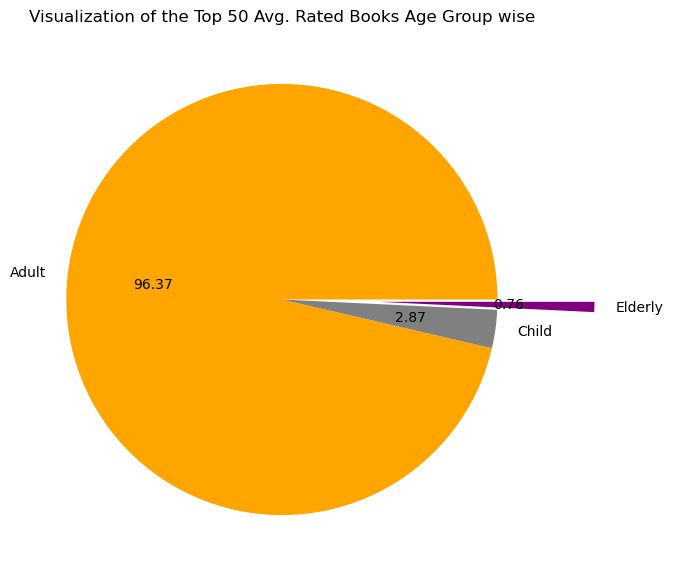

In [47]:
#Visualising the Top 50 Avg.Rated Books Age group wise
plt.figure(figsize=(14,7))
plt.pie(user['Age'].value_counts(), labels=['Adult', 'Child', 'Elderly'],
        autopct='%0.2f', colors=['orange', 'grey', 'purple'], explode=[0.0, 0.0, 0.45])
plt.title('Visualization of the Top 50 Avg. Rated Books Age Group wise')
plt.show()

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
user['Age']= label_encoder.fit_transform(user['Age'])

In [49]:
user["Age"].value_counts(normalize=True)

0    0.963706
1    0.028678
2    0.007617
Name: Age, dtype: float64

In [50]:
#Drop duplicate rows
user.drop_duplicates(keep='last', inplace=True)
user.reset_index(drop=True, inplace=True)

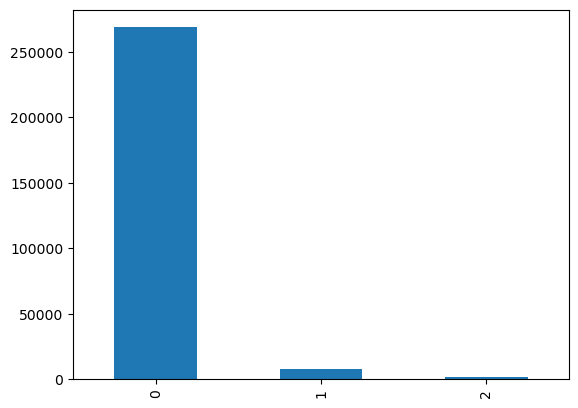

In [53]:
user['Age'].value_counts().plot(kind='bar');
plt.show()

In [54]:
user['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [55]:
for i in user:
    user['Country']=user.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [56]:
user['Country']=user['Country'].astype('str')

In [57]:
d=list(user.Country.unique())
d=set(d)
d=list(d)
d = [x for x in d if x is not None]
d.sort()
print(d)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [58]:
user = user.drop(columns=['Location'],axis=1)

In [59]:
user['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

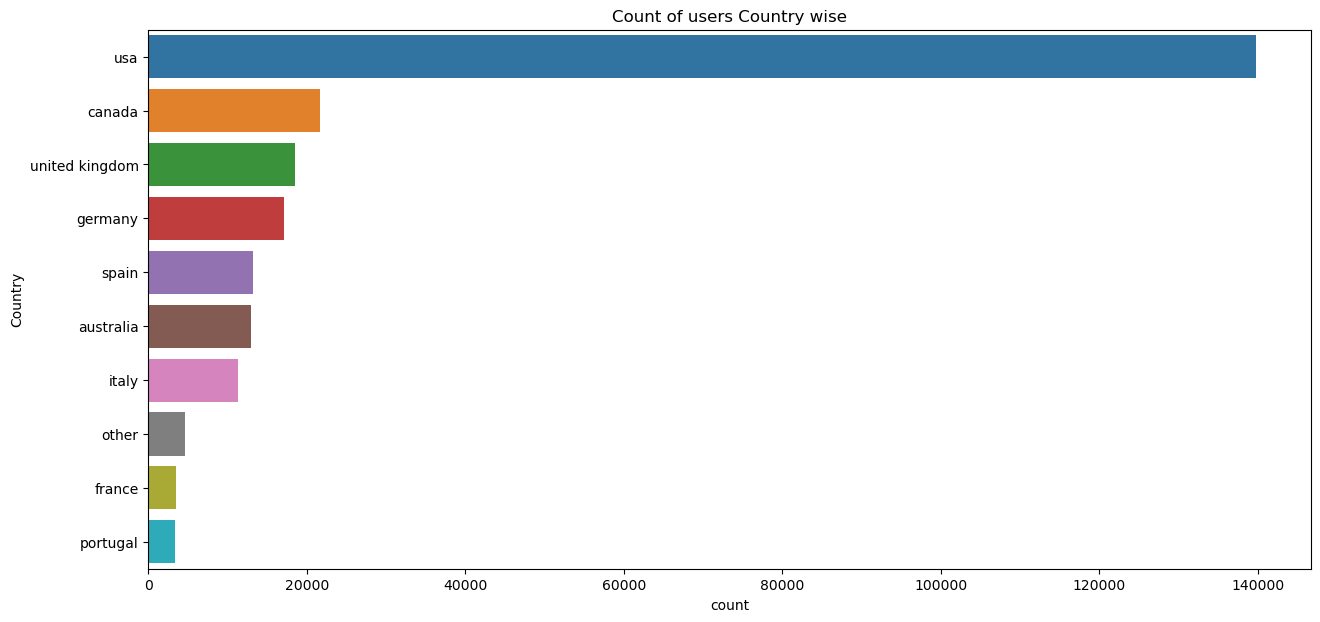

In [60]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=user,order=pd.value_counts(user['Country']).iloc[:10].index)
plt.title('Count of users Country wise')
plt.show()

In [62]:
#Read ratings data set
ratings=pd.read_csv(r'C:\Users\Rahul\Desktop\Github Files\Book Reccomendation System\data sets\Ratings.csv',encoding='Latin1')
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [63]:
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [64]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [66]:
#Checking whether all ratings numeric or not
from pandas.api.types import is_numeric_dtype
print(is_numeric_dtype(ratings['Book-Rating']))

True


In [67]:
#Converting all alphabets in ISBN to upper case
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [68]:
#Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [69]:
ratings.sample()

,User-ID,ISBN,Book-Rating
93316,20971,0590568795,0


In [70]:
#Segregating implicit and explict ratings datasets
ratings_explicit = ratings[ratings['Book-Rating'] != 0]
ratings_implicit = ratings[ratings['Book-Rating'] == 0]

In [71]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (433671, 3)
ratings_implicit dataset (716109, 3)


In [72]:
#Let's find the top 5 books which are rated by most number of users.
rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333


In [73]:
most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [74]:
data= pd.merge(books, ratings, on='ISBN', how='inner')
data = pd.merge(data, user, on='User-ID', how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031273 entries, 0 to 1031272
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031273 non-null  object
 1   Book-Title           1031273 non-null  object
 2   Book-Author          1031273 non-null  object
 3   Year-Of-Publication  1031273 non-null  int32 
 4   Publisher            1031273 non-null  object
 5   User-ID              1031273 non-null  int64 
 6   Book-Rating          1031273 non-null  int64 
 7   Age                  1031273 non-null  int32 
 8   Country              1031273 non-null  object
dtypes: int32(2), int64(2), object(5)
memory usage: 70.8+ MB


In [76]:
data.shape

(1031273, 9)

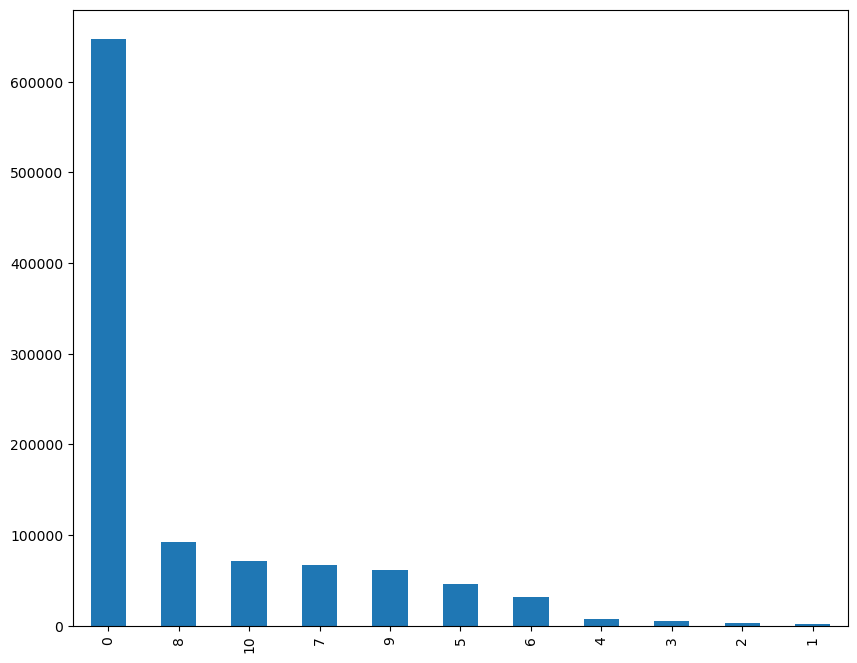

In [77]:
plt.figure(figsize=(10,8))
data["Book-Rating"].value_counts().plot(kind="bar")
plt.show()

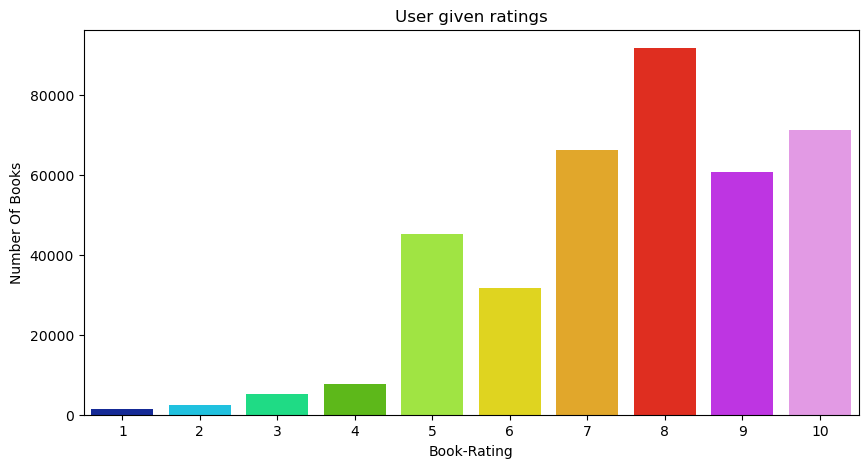

In [78]:
#Visualising the Ratings given by users who read book
plt.figure(figsize=(10,5))
data = data[data['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data, palette='gist_ncar')
plt.title("User given ratings")
plt.ylabel("Number Of Books")
plt.show()

In [80]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,0,canada
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,0,canada
12,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,0,canada
13,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,0,canada
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,0,canada


In [81]:
data["Book-Rating"].value_counts()

8     91814
10    71240
7     66408
9     60786
5     45360
6     31693
4      7617
3      5118
2      2375
1      1481
Name: Book-Rating, dtype: int64

In [82]:
data.loc[(data['Book-Rating'] == 0),'Book-Rating']=np.NaN

#Replacing null data with median
data['Book-Rating'] = data['Book-Rating'].fillna(data.groupby('Age')['Book-Rating'].transform('median'))
data['Book-Rating'].unique()

array([ 5.,  6.,  7.,  9.,  8., 10.,  3.,  1.,  4.,  2.])

In [83]:
data['Book-Rating'].value_counts()

8.0     91814
10.0    71240
7.0     66408
9.0     60786
5.0     45360
6.0     31693
4.0      7617
3.0      5118
2.0      2375
1.0      1481
Name: Book-Rating, dtype: int64

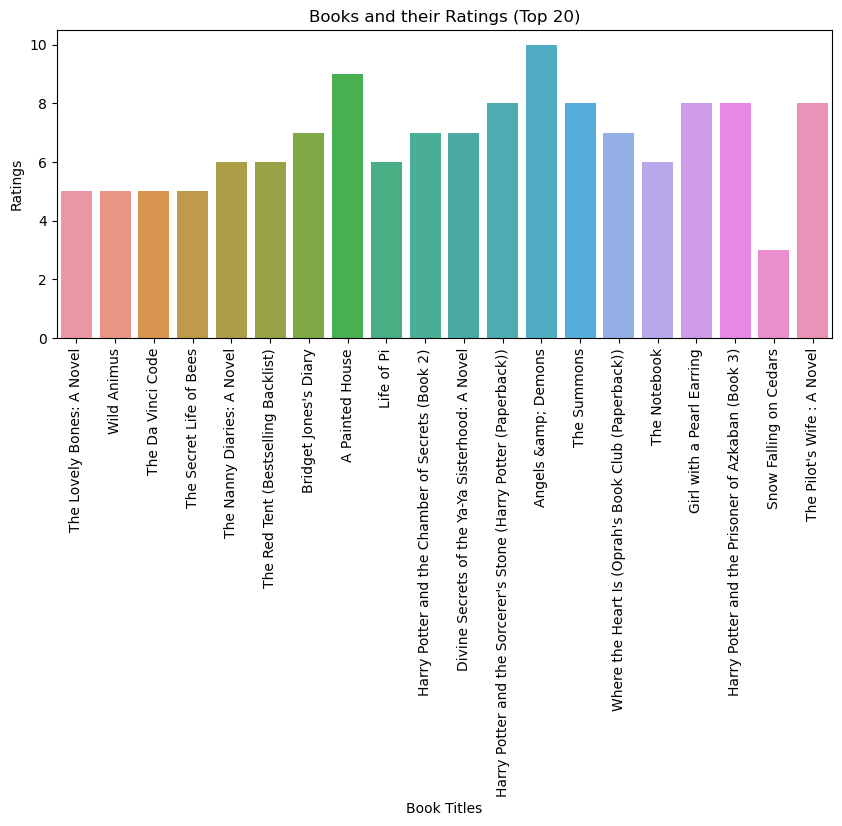

In [86]:
plt.figure(figsize=(10, 5
                    ))
sns.barplot(x=data['Book-Title'].value_counts().index[:20], y=data['Book-Rating'].values[:20])
plt.title("Books and their Ratings (Top 20)")
plt.xlabel("Book Titles")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
plt.show()

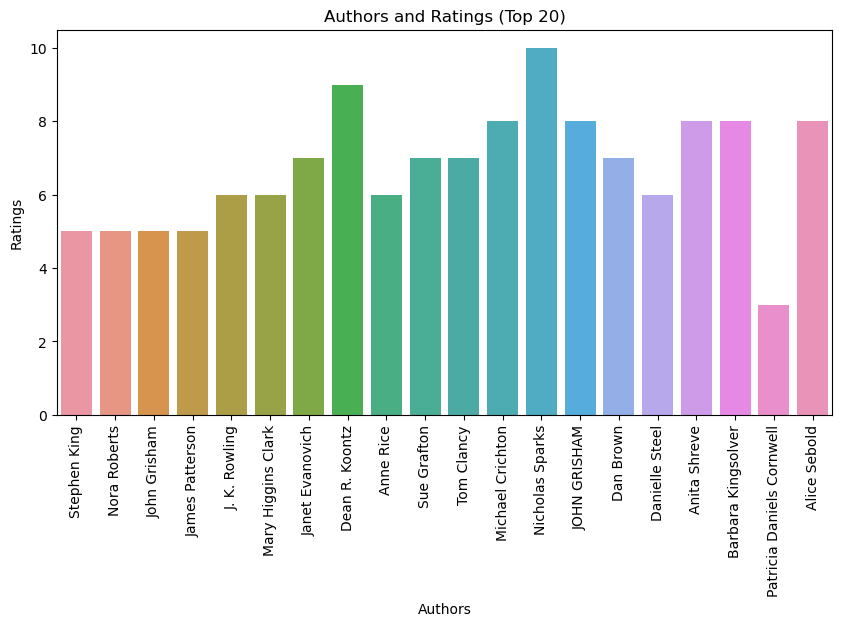

In [87]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data['Book-Author'].value_counts().index[:20], y=data['Book-Rating'].values[:20])
plt.title("Authors and Ratings (Top 20)")
plt.xlabel("Authors")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
plt.show()

In [88]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [89]:
missing_values(data)

,index,Missing Values,% of Total Values,Data_type
0,ISBN,0,0.0,object
1,Book-Title,0,0.0,object
2,Book-Author,0,0.0,object
3,Year-Of-Publication,0,0.0,int32
4,Publisher,0,0.0,object
5,User-ID,0,0.0,int64
6,Book-Rating,0,0.0,float64
7,Age,0,0.0,int32
8,Country,0,0.0,object


In [90]:
data['User-ID'].value_counts()

11676     6943
98391     5692
189835    1899
153662    1846
23902     1180
          ... 
142241       1
42263        1
67598        1
67244        1
259679       1
Name: User-ID, Length: 68091, dtype: int64

In [72]:
data['User-ID'].unique().shape

(68091,)

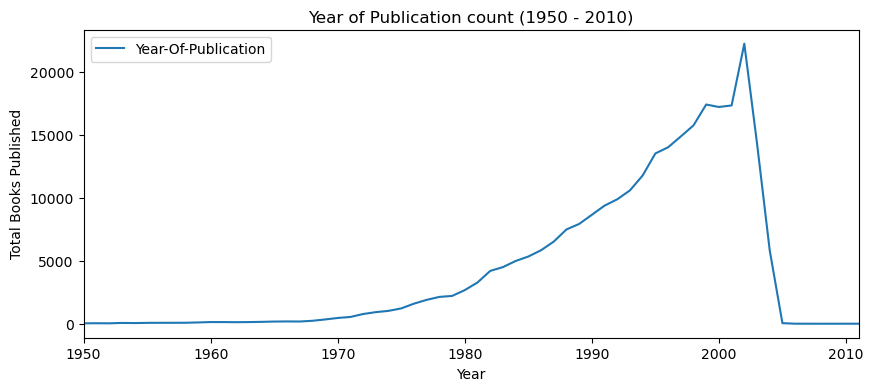

In [91]:
year_count=books['Year-Of-Publication'].value_counts()
year_count=pd.DataFrame(year_count)

plt.figure(figsize=(10, 4))
sns.lineplot(data=year_count)
plt.title('Year of Publication count (1950 - 2010)')
plt.xlim(1950, 2011)
plt.xlabel('Year')
plt.ylabel('Total Books Published')
plt.show()


In [93]:
import plotly.express as px

In [94]:
def plot_top20(df, column, title, x_label, y_label, top=20, template = 'plotly_dark'):

    pl = df[column].value_counts().head(top)
    fig = px.bar(y=pl.values,
                 x=pl.index,

                 text=pl.values,
                 title= title,
                 template= template)
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        font = dict(size=15))
    fig.show()


In [96]:
plot_top20(books, 'Book-Author', "Top 20 Authors by books", "Author name", "Count")

In [97]:
plot_top20(books, 'Publisher', "Top 20 Publishers of books", "Publisher name", "Count")


In [98]:
plot_top20(books, 'Year-Of-Publication', 'Top 20 years in which books were published ', "Year", "Count")

In [99]:
from plotly.subplots import make_subplots
import plotly. graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [100]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=10),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,'xanchor': 'center',
                             'yanchor': 'top'},

                      template='plotly_white')

    iplot(fig)
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']
cat_summary_with_graph(data, 'Book-Rating')

In [101]:
df = data[data['Book-Rating'] != 0]
plot_top20(df, 'Book-Title', "Most Rated Books by Users", "Book Title", "Number of ratings")

In [102]:
#Top rated books
books_top20 = df['Book-Title'].value_counts().head(20)
books_top20 = list(books_top20.index)

top20_books = pd.DataFrame(columns = data.columns)

for book in books_top20:

    cond_df = data[data['Book-Title'] == book]

    top20_books =  pd.concat([top20_books, cond_df], axis=0)


top20_books = top20_books[top20_books['Book-Rating'] != 0]
top20_books = top20_books.groupby('Book-Title')['Book-Rating'].agg('mean').reset_index().sort_values(by='Book-Rating', ascending=False)

top10_books = top20_books.head(10)
top10_books


,Book-Title,Book-Rating
6,Harry Potter and the Prisoner of Azkaban (Book 3),9.043321
7,Harry Potter and the Sorcerer's Stone (Harry P...,8.936508
5,Harry Potter and the Chamber of Secrets (Book 2),8.840491
16,The Secret Life of Bees,8.477833
10,The Da Vinci Code,8.439271
11,The Lovely Bones: A Novel,8.185290
15,The Red Tent (Bestselling Backlist),8.182768
18,Where the Heart Is (Oprah's Book Club (Paperba...,8.142373
8,Life of Pi,8.080357
1,Angels &amp; Demons,8.016129


In [103]:
fig = px.bar(y=top10_books['Book-Rating'],
             x=top10_books['Book-Title'],
             text=round(top10_books['Book-Rating'],2),
             title= "Top 10 rated books by the users",
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Book title",
    yaxis_title="average rating",
    font = dict(size=15))
fig.show()

## Popularity Based Recommendation System
### Most Popular Books

In [105]:
def prGreen(skk): print("\033[92m {}\033[00m" .format(skk))
def prRed(skk): print("\033[91m {}\033[00m" .format(skk))
def prYellow(skk): print("\033[93m {}\033[00m" .format(skk))


def popular_books():

    for (book, ratings) in zip(top10_books['Book-Title'], top10_books['Book-Rating']):
        prGreen(book)
        print("Rating",end='->')
        prRed(round(ratings,1))
        print("-"*50)

popular_books()

 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; Demons
Rating-> 8.0
--------------------------------------------------


## Collaborative Filtering Based Recommendation System
### Item Based Collaborative Filtering


In [106]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [107]:
#We are going to count the ratings of the books to classify the common and the rare ones
count_rate = pd.DataFrame(df['Book-Title'].value_counts())
count_rate.head()

,Book-Title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393


In [108]:
#We are going to classify the rare books as the books which were rated 100 or less times

rare_books=count_rate[count_rate["Book-Title"]<=100].index
rare_books[:5]


Index(['Don't Sweat the Small Stuff and It's All Small Stuff : Simple Ways to Keep the Little Things from Taking Over Your Life (Don't Sweat the Small Stuff Series)',
       'Disclosure', 'Deception Point', 'Daddy's Little Girl', 'Night'],
      dtype='object')

In [109]:
len(rare_books)

135376

In [110]:
#If the book is not included in the rare books we are going to classify it as common one

common_books=df[~df["Book-Title"].isin(rare_books)]
common_books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
19,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400,9.0,0,canada
20,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400,6.0,0,canada
22,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400,7.0,0,canada
27,0743418174,Good in Bed,Jennifer Weiner,2002,Washington Square Press,11400,8.0,0,canada
37,0440222656,The Horse Whisperer,Nicholas Evans,1996,Dell,11400,6.0,0,canada


In [111]:
common_books.shape

(33641, 9)

In [112]:
#Make recommendation if the book is common

#First lets create pivot table which its index is the Users IDs and the columns are the books titles and the values are the rating of the user to that book


item_based_cb = common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
item_based_cb.head(5)


Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
#Creating recommendation df with the corrwith function

book_title = 'Me Talk Pretty One Day'
sim = item_based_cb[book_title]
recommendation_df=pd.DataFrame(item_based_cb.corrwith(sim).sort_values(ascending=False)).reset_index(drop=False)
recommendation_df

,Book-Title,0
0,Me Talk Pretty One Day,1.0
1,Left Behind: A Novel of the Earth's Last Days ...,1.0
2,"A Child Called \It\"": One Child's Courage to S...",1.0
3,Lord of the Flies,1.0
4,The Chamber,1.0
...,...,...
187,The Rescue,NaN
188,"The Return of the King (The Lord of the Rings,...",NaN
189,The Smoke Jumper,NaN
190,When the Wind Blows,NaN


In [115]:
#Lets check if the book the user choosen is included in the recommendation df or not,
# if it is included we don't want to recommend it
# so we will make sure to drop it

if not recommendation_df['Book-Title'][recommendation_df['Book-Title'] == book_title].empty:
    recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==book_title].index[0])


In [116]:
#Lets now collect the books with less ratings ( average rating is less than 5)

less_rating=[]
for i in recommendation_df["Book-Title"]:
    if df[df["Book-Title"]==i]["Book-Rating"].mean() < 5:
        less_rating.append(i)

less_rating



['Wild Animus']

In [117]:
#Rank the highly rated books
if recommendation_df.shape[0] - len(less_rating) > 5:

    recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]
    recommendation_df.columns=["Book-Title","Correlation"]


for (candidate_book, corr) in zip(recommendation_df['Book-Title'], recommendation_df['Correlation']):
    corr_thershold = 0.7
    if corr > corr_thershold:
        ratings = df[df['Book-Title'] == candidate_book]['Book-Rating'].mean()
        prGreen(candidate_book)
        print("Rating ", end = '->')
        prRed(round(ratings,1))
        print("-"*50)
    else:
        break

 Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)
Rating -> 7.7
--------------------------------------------------
 A Child Called \It\": One Child's Courage to Survive"
Rating -> 8.0
--------------------------------------------------
 Lord of the Flies
Rating -> 8.0
--------------------------------------------------
 The Chamber
Rating -> 7.4
--------------------------------------------------
 The Poisonwood Bible: A Novel
Rating -> 8.2
--------------------------------------------------
 The Lost World
Rating -> 7.2
--------------------------------------------------
 Four Blind Mice
Rating -> 8.2
--------------------------------------------------
 It
Rating -> 8.1
--------------------------------------------------
 She's Come Undone (Oprah's Book Club)
Rating -> 7.7
--------------------------------------------------
 While I Was Gone
Rating -> 7.0
--------------------------------------------------
 The Reader
Rating -> 7.2
---------------------------------------------

#### We have created the Recommendation System

#### Item based collaborative recommendation system is ready, next we have to put it all together to bulild our Recommendation System

In [118]:
def item_based_coll_rs(book_title):

    book_title = str(book_title)
    if book_title in data['Book-Title'].values:

        count_rate = pd.DataFrame(df['Book-Title'].value_counts())
        rare_books=count_rate[count_rate["Book-Title"]<=100].index

        common_books=df[~df["Book-Title"].isin(rare_books)]

        if book_title in rare_books:
            prYellow("A rare book, so u may try our popular books: \n ")
            popular_books()

        else:

            item_based_cb = common_books.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            sim = item_based_cb[book_title]
            recommendation_df=pd.DataFrame(item_based_cb.corrwith(sim).sort_values(ascending=False)).reset_index(drop=False)

            if not recommendation_df['Book-Title'][recommendation_df['Book-Title'] == book_title].empty:
                recommendation_df=recommendation_df.drop(recommendation_df[recommendation_df["Book-Title"]==book_title].index[0])

            less_rating=[]
            for i in recommendation_df["Book-Title"]:
                if df[df["Book-Title"]==i]["Book-Rating"].mean() < 5:
                    less_rating.append(i)

            if recommendation_df.shape[0] - len(less_rating) > 5:

                recommendation_df=recommendation_df[~recommendation_df["Book-Title"].isin(less_rating)]
                recommendation_df.columns=["Book-Title","Correlation"]


            for (candidate_book, corr) in zip(recommendation_df['Book-Title'], recommendation_df['Correlation']):
                corr_thershold = 0.7
                if corr > corr_thershold:
                    ratings = df[df['Book-Title'] == candidate_book]['Book-Rating'].mean()
                    prGreen(candidate_book)
                    print("Rating ", end = '->')
                    prRed(round(ratings,1))
                    print("-"*50)
                else:
                    break

    else:
        prYellow("This book is not in our library, check out our most popular books:")
        print()
        popular_books()

In [119]:
item_based_coll_rs('Me Talk Pretty One Day')

 Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)
Rating -> 7.7
--------------------------------------------------
 A Child Called \It\": One Child's Courage to Survive"
Rating -> 8.0
--------------------------------------------------
 Lord of the Flies
Rating -> 8.0
--------------------------------------------------
 The Chamber
Rating -> 7.4
--------------------------------------------------
 The Poisonwood Bible: A Novel
Rating -> 8.2
--------------------------------------------------
 The Lost World
Rating -> 7.2
--------------------------------------------------
 Four Blind Mice
Rating -> 8.2
--------------------------------------------------
 It
Rating -> 8.1
--------------------------------------------------
 She's Come Undone (Oprah's Book Club)
Rating -> 7.7
--------------------------------------------------
 While I Was Gone
Rating -> 7.0
--------------------------------------------------
 The Reader
Rating -> 7.2
---------------------------------------------

In [120]:
item_based_coll_rs("From One to One Hundred")

 A rare book, so u may try our popular books: 
 
 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; Demons
Rating-> 8.0
--

In [121]:
item_based_coll_rs("Harry Potter and the Prisoner of Azkaban (Book 3)")

 The Beach House
Rating -> 7.7
--------------------------------------------------
 Mystic River
Rating -> 7.9
--------------------------------------------------
 The Blind Assassin
Rating -> 7.5
--------------------------------------------------
 Back Roads
Rating -> 7.3
--------------------------------------------------
 Unnatural Exposure
Rating -> 7.8
--------------------------------------------------
 Angela's Ashes (MMP) : A Memoir
Rating -> 8.0
--------------------------------------------------
 The Smoke Jumper
Rating -> 7.4
--------------------------------------------------
 Isle of Dogs
Rating -> 5.4
--------------------------------------------------
 The Color of Water: A Black Man's Tribute to His White Mother
Rating -> 8.3
--------------------------------------------------
 Pigs in Heaven
Rating -> 8.0
--------------------------------------------------
 Tell No One
Rating -> 8.1
--------------------------------------------------
 Pet Sematary
Rating -> 7.9
-----------------

In [122]:
item_based_coll_rs("Harry Potter and the Prisoner of Azkaban (Book 3)")


 The Beach House
Rating -> 7.7
--------------------------------------------------
 Mystic River
Rating -> 7.9
--------------------------------------------------
 The Blind Assassin
Rating -> 7.5
--------------------------------------------------
 Back Roads
Rating -> 7.3
--------------------------------------------------
 Unnatural Exposure
Rating -> 7.8
--------------------------------------------------
 Angela's Ashes (MMP) : A Memoir
Rating -> 8.0
--------------------------------------------------
 The Smoke Jumper
Rating -> 7.4
--------------------------------------------------
 Isle of Dogs
Rating -> 5.4
--------------------------------------------------
 The Color of Water: A Black Man's Tribute to His White Mother
Rating -> 8.3
--------------------------------------------------
 Pigs in Heaven
Rating -> 8.0
--------------------------------------------------
 Tell No One
Rating -> 8.1
--------------------------------------------------
 Pet Sematary
Rating -> 7.9
-----------------

In [123]:
item_based_coll_rs("Tuesdays with Morrie An Old Man a Young Man and Life s Greatest Lesson")


 This book is not in our library, check out our most popular books:

 Harry Potter and the Prisoner of Azkaban (Book 3)
Rating-> 9.0
--------------------------------------------------
 Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Rating-> 8.9
--------------------------------------------------
 Harry Potter and the Chamber of Secrets (Book 2)
Rating-> 8.8
--------------------------------------------------
 The Secret Life of Bees
Rating-> 8.5
--------------------------------------------------
 The Da Vinci Code
Rating-> 8.4
--------------------------------------------------
 The Lovely Bones: A Novel
Rating-> 8.2
--------------------------------------------------
 The Red Tent (Bestselling Backlist)
Rating-> 8.2
--------------------------------------------------
 Where the Heart Is (Oprah's Book Club (Paperback))
Rating-> 8.1
--------------------------------------------------
 Life of Pi
Rating-> 8.1
--------------------------------------------------
 Angels &amp; De

In [124]:
item_based_coll_rs("The Da Vinci Code")


 Silence of the Lambs
Rating -> 8.4
--------------------------------------------------
 Dance upon the Air (Three Sisters Island Trilogy)
Rating -> 8.0
--------------------------------------------------
 Unnatural Exposure
Rating -> 7.8
--------------------------------------------------
 The Divine Secrets of the Ya-Ya Sisterhood: A Novel
Rating -> 7.8
--------------------------------------------------
 The Smoke Jumper
Rating -> 7.4
--------------------------------------------------
 Four Blind Mice
Rating -> 8.2
--------------------------------------------------
 Back Roads
Rating -> 7.3
--------------------------------------------------
 Girl, Interrupted
Rating -> 7.3
--------------------------------------------------
 The Hitchhiker's Guide to the Galaxy
Rating -> 8.5
--------------------------------------------------
 Pop Goes the Weasel
Rating -> 7.5
--------------------------------------------------
 A Map of the World
Rating -> 7.0
---------------------------------------------

## User Based Collaborative Filtering

In [125]:
#Active users who are present in the dataset more than 100 times

new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 100]
new_df.shape


(102386, 9)

In [126]:
#Lets make our matrix, User as indcies, Books as columns and finally ratings as values

users_matrix=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_matrix.head()

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",...,termcap &amp; terminfo (O'Reilly Nutshell),the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# User favorite books
# At first recommend to that user

user_id = 2033
users_fav=new_df[new_df["User-ID"]==user_id].sort_values(["Book-Rating"],ascending=False)[0:5]
users_fav.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
847380,0142000663,The Grapes of Wrath: John Steinbeck Centennial...,John Steinbeck,2002,Penguin Books,2033,10.0,0,usa
847506,0451458028,The Invisible Ring,Anne Bishop,2000,Roc,2033,10.0,0,usa
847500,0886775035,The Last of the Renshai,Mickey Zucker Reichert,1996,Daw Books,2033,10.0,0,usa
847497,0886778603,The Children of Wrath (Renshai Chronicles),Mickey Zucker Reichert,1999,Daw Books,2033,10.0,0,usa
847489,0812516850,Flux: Tales of Human Futures,Orson Scott Card,1992,Tor Books (Mm),2033,10.0,0,usa


In [128]:
#Calculate the similarity between the active user and other users


index=np.where(users_matrix.index==2033)[0][0]
index

0

In [129]:
#Replace nan values with 0 to calculate similarity


users_matrix.fillna(0, inplace=True)


In [130]:
similarity=cosine_similarity(users_matrix)
similarity[0]

array([1.        , 0.        , 0.04891515, 0.        , 0.        ,
       0.        , 0.        , 0.03929139, 0.        , 0.        ,
       0.00800132, 0.01070131, 0.        , 0.0083468 , 0.01596073,
       0.        , 0.05050746, 0.0144805 , 0.        , 0.01361225,
       0.01788961, 0.        , 0.00816504, 0.01466189, 0.        ,
       0.        , 0.        , 0.00349099, 0.00601765, 0.01118765,
       0.00833881, 0.        , 0.01628214, 0.        , 0.02285858,
       0.00300214, 0.01412804, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01610649, 0.        ,
       0.        , 0.02567378, 0.04838656, 0.        , 0.        ,
       0.        , 0.00804841, 0.01006917, 0.        , 0.01801815,
       0.        , 0.00459992, 0.        , 0.01784157, 0.        ,
       0.0180704 , 0.00917361, 0.01097582, 0.00815783, 0.01548321,
       0.03436162, 0.10402405, 0.        , 0.        , 0.        ,
       0.01839113, 0.        , 0.        , 0.0109679 , 0.01058

In [131]:
#Getting users similar to the active user



similar_users = list(enumerate(similarity[index]))
similar_users[:5]


[(0, 1.0000000000000002),
 (1, 0.0),
 (2, 0.04891514740916593),
 (3, 0.0),
 (4, 0.0)]

In [132]:
#Sort users with high similarity, will come first so we can recommend their interest to the active user

similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[1:6]
similar_users

[(66, 0.10402405281152009),
 (411, 0.07871336103707649),
 (81, 0.058320724694032294),
 (271, 0.05725842592005894),
 (285, 0.05643216345768348)]

In [133]:
#Return the user Id for the similair users

user_rec=[]

for i in similar_users:
        data=df[df["User-ID"]==users_matrix.index[i[0]]]
        user_rec.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))

user_rec

[38281, 257204, 52350, 170634, 179978]

In [134]:
x=new_df[new_df["User-ID"]==user_id]
recommend_books=[]
user=list(user_rec)
for i in user:
    y=new_df[(new_df["User-ID"]==i)]
    sim_books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
    sim_books=sim_books.sort_values(["Book-Rating"],ascending=False)[0:5]
    recommend_books.extend(sim_books["Book-Title"].values)

recommend_books

['The Stories of Hans Christian Andersen: A New Translation from the Danish',
 'Chillida: 1948-1998',
 'Middlesex: A Novel',
 'Greek Grammar',
 'Maps in a Mirror (Maps in a Mirror)',
 'Night Mare (Xanth Novels (Paperback))',
 "The King's Justice (Histories of King Kelson)",
 'Blue Adept (Apprentice Adept (Paperback))',
 'Fifth Quarter (Daw Book Collectors)',
 'No Quarter (Daw Book Collectors)',
 'Krazy Kat',
 'Tintin in Tibet (The Adventures of Tintin)',
 '300',
 'Sin City: Booze, Broads, &amp; Bullets',
 'Yukon Ho',
 'Deep in the Forest (Picture Puffins)',
 'Eye power: Improved self-awareness, vitality, and mental efficiency through visual training',
 'The Continuing Mission (Star Trek: The Next Generation)',
 'Keeshond (Kw Dog Breed Library)',
 'Square Foot Gardening',
 'The Tao of Pooh',
 'Town Mouse Country Mouse',
 'Alice in Wonderland (Scholastic Junior Classics)',
 'The Mitten: A Ukrainian Folktale',
 'Junior Girl Scout Badgebook']

In [135]:
#Let's put it all together for user based rs
new_df=df[df['User-ID'].map(df['User-ID'].value_counts()) > 100]
users_matrix=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_matrix.fillna(0, inplace=True)

In [136]:
users_matrix

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)","Q-Zone (Star Trek The Next Generation, Book 48)",...,termcap &amp; terminfo (O'Reilly Nutshell),the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
def user_based_coll_rs(user_id):

    users_fav=new_df[new_df["User-ID"]==user_id].sort_values(["Book-Rating"],ascending=False)[0:5]

    prYellow("Your Top Favorite books: \n")

    for book in users_fav['Book-Title']:

        prGreen(book)
        print("Rating", end='->')
        prRed(round(df[df['Book-Title'] == book]['Book-Rating'].mean(), 2))
        print("-"*50)

    print("\n\n")

    index=np.where(users_matrix.index==user_id)[0][0]

    similarity=cosine_similarity(users_matrix)
    similar_users = list(enumerate(similarity[index]))
    similar_users = sorted(similar_users,key = lambda x:x[1],reverse=True)[0:5]

    users_id=[]

    for i in similar_users:
            data=df[df["User-ID"]==users_matrix.index[i[0]]]
            users_id.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))


    x=new_df[new_df["User-ID"]==user_id]
    recommend_books=[]
    user=list(users_id)

    for i in user:

        y=new_df[(new_df["User-ID"]==i)]
        sim_books=y.loc[~y["Book-Title"].isin(x["Book-Title"]),:]
        sim_books=sim_books.sort_values(["Book-Rating"],ascending=False)[0:5]
        recommend_books.extend(sim_books["Book-Title"].values)


    prYellow("Recommended for you: \n")

    for book in recommend_books:
        prGreen(book)
        print("Rating",end='->')
        prRed(round(df[df['Book-Title'] == book]['Book-Rating'].mean(),2))
        print("-"*50)


In [139]:
user_based_coll_rs(2033)

 Your Top Favorite books: 

 The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002)
Rating-> 8.46
--------------------------------------------------
 The Invisible Ring
Rating-> 8.14
--------------------------------------------------
 The Last of the Renshai
Rating-> 8.0
--------------------------------------------------
 The Children of Wrath (Renshai Chronicles)
Rating-> 8.5
--------------------------------------------------
 Flux: Tales of Human Futures
Rating-> 9.5
--------------------------------------------------



 Recommended for you: 

 The Stories of Hans Christian Andersen: A New Translation from the Danish
Rating-> 10.0
--------------------------------------------------
 Chillida: 1948-1998
Rating-> 9.0
--------------------------------------------------
 Middlesex: A Novel
Rating-> 8.22
--------------------------------------------------
 Greek Grammar
Rating-> 9.33
--------------------------------------------------
 Maps in a Mirror (Maps in a Mirror)
Rating-> 

In [140]:
user_based_coll_rs(4385)

 Your Top Favorite books: 

 Sons of Texas : Callaway Country
Rating-> 10.0
--------------------------------------------------
 When Somebody Needs You (Silhouette Special Edition, No 784)
Rating-> 7.5
--------------------------------------------------
 Dance For A Stranger (Harlequin Presents, No 1493)
Rating-> 10.0
--------------------------------------------------
 Accent on Desire (Second Chance at Love, No 420)
Rating-> 10.0
--------------------------------------------------
 Exile's End (Silhouette Intimate Moments, No 449)
Rating-> 9.5
--------------------------------------------------



 Recommended for you: 

 It's Always Something
Rating-> 8.26
--------------------------------------------------
 Love Tangle
Rating-> 8.5
--------------------------------------------------
 Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson
Rating-> 8.59
--------------------------------------------------
 Princess Sultana's Daughters
Rating-> 8.4
-------------------------

In [141]:
user_based_coll_rs(31556)


 Your Top Favorite books: 

 To Kill a Mockingbird
Rating-> 8.98
--------------------------------------------------
 Fat Men from Space
Rating-> 10.0
--------------------------------------------------
 We Live in Ireland (Living Here)
Rating-> 10.0
--------------------------------------------------
 A Wrinkle in Time
Rating-> 8.61
--------------------------------------------------
 The Tale of Benjamin Bunny (The Peter Rabbit Classics)
Rating-> 10.0
--------------------------------------------------



 Recommended for you: 

 SILVERWING
Rating-> 8.0
--------------------------------------------------
 Almost Adam: A Novel
Rating-> 6.82
--------------------------------------------------
 Year of Wonders: A Novel of the Plague
Rating-> 8.05
--------------------------------------------------
 SAILING FUNDAMENTALS
Rating-> 10.0
--------------------------------------------------
 Stiff: The Curious Lives of Human Cadavers
Rating-> 8.68
--------------------------------------------------
 Har

In [142]:
user_based_coll_rs(2033)

 Your Top Favorite books: 

 The Grapes of Wrath: John Steinbeck Centennial Edition (1902-2002)
Rating-> 8.46
--------------------------------------------------
 The Invisible Ring
Rating-> 8.14
--------------------------------------------------
 The Last of the Renshai
Rating-> 8.0
--------------------------------------------------
 The Children of Wrath (Renshai Chronicles)
Rating-> 8.5
--------------------------------------------------
 Flux: Tales of Human Futures
Rating-> 9.5
--------------------------------------------------



 Recommended for you: 

 The Stories of Hans Christian Andersen: A New Translation from the Danish
Rating-> 10.0
--------------------------------------------------
 Chillida: 1948-1998
Rating-> 9.0
--------------------------------------------------
 Middlesex: A Novel
Rating-> 8.22
--------------------------------------------------
 Greek Grammar
Rating-> 9.33
--------------------------------------------------
 Maps in a Mirror (Maps in a Mirror)
Rating-> 

In [143]:
user_based_coll_rs(278418)

 Your Top Favorite books: 

 Dr. Atkin's Diet Revolution
Rating-> 8.0
--------------------------------------------------
 KJV Giant Print Reference Bible, Personal Size Bronze Edition
Rating-> 10.0
--------------------------------------------------
 Green Eggs and Ham (I Can Read It All by Myself Beginner Books)
Rating-> 9.09
--------------------------------------------------
 The Sign of the Beaver
Rating-> 7.17
--------------------------------------------------
 Ramona Quimby
Rating-> 8.5
--------------------------------------------------



 Recommended for you: 

 Remember When (Roberts, Nora)
Rating-> 9.07
--------------------------------------------------
 Tears of the Moon (Irish Trilogy)
Rating-> 7.87
--------------------------------------------------
 Untamed
Rating-> 7.76
--------------------------------------------------
 The Macgregors: Daniel-Ian
Rating-> 7.69
--------------------------------------------------
 Once upon a Dream
Rating-> 7.6
-------------------------------

In [144]:
users_fav.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
847380,0142000663,The Grapes of Wrath: John Steinbeck Centennial...,John Steinbeck,2002,Penguin Books,2033,10.0,0,usa
847506,0451458028,The Invisible Ring,Anne Bishop,2000,Roc,2033,10.0,0,usa
847500,0886775035,The Last of the Renshai,Mickey Zucker Reichert,1996,Daw Books,2033,10.0,0,usa
847497,0886778603,The Children of Wrath (Renshai Chronicles),Mickey Zucker Reichert,1999,Daw Books,2033,10.0,0,usa
847489,0812516850,Flux: Tales of Human Futures,Orson Scott Card,1992,Tor Books (Mm),2033,10.0,0,usa
